# LTC-PGCLC scRNA-Seq Analysis

In [1]:
#Be sure to download appropriate dependencies
#i.e. pip3 install scanpy

import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

sc.settings.verbosity = 3 

In [2]:
sc.settings.set_figure_params(dpi=80)

## Quality Control and Normalization

In [3]:
adata = sc.read_10x_h5('filtered_feature_bc_matrix.h5')
#Filter out cells with <5000 UMIs
sc.pp.filter_cells(adata, min_counts=5000)

reading filtered_feature_bc_matrix.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:02)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
filtered out 6023 cells that have less than 5000 counts
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [4]:
# normalize to depth 10,000
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

# logaritmize
sc.pp.log1p(adata)

# store normalized counts in the raw slot, 
# we will subset adata.X for variable genes, but want to keep all genes matrix as well.
adata.raw = adata

adata

normalizing by total count per cell
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


AnnData object with n_obs × n_vars = 9969 × 36601
    obs: 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'log1p'

extracting highly variable genes
    finished (0:00:03)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


Highly variable genes: 1779


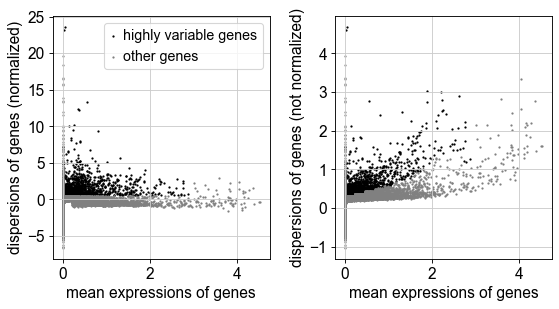

In [5]:
# compute variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
print("Highly variable genes: %d"%sum(adata.var.highly_variable))

#plot variable genes
sc.pl.highly_variable_genes(adata)

# subset for variable genes in the dataset
adata = adata[:, adata.var['highly_variable']]

In [6]:
sc.pp.neighbors(adata, n_pcs = 30, n_neighbors = 20)

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:02)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:39)


## Analysis

In [58]:
#Create UMAP coordinates
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:20)


In [56]:
#Grab barcodes
barcodes = list(sc.get.obs_df(adata).index)
sample_id = ['hPGCLC (Female)', 'hPGCLC (Male)', 'hiPSC (Female)', 'hiPSC (Male)']
samples = []
for bc in barcodes:
    samples.append(sample_id[int(bc[-1])-1])
#Create sample feature list
adata.obs['sample'] = samples
print(adata.obs['sample'])

AAACCTGAGACTCGGA-1    hPGCLC (Female)
AAACCTGAGCCGGTAA-1    hPGCLC (Female)
AAACCTGCAAGTCATC-1    hPGCLC (Female)
AAACCTGCAATCTGCA-1    hPGCLC (Female)
AAACCTGCAGATCTGT-1    hPGCLC (Female)
                           ...       
TTTGGTTTCATGCATG-4       hiPSC (Male)
TTTGGTTTCCACTCCA-4       hiPSC (Male)
TTTGGTTTCTTGTCAT-4       hiPSC (Male)
TTTGTCAAGATGTGTA-4       hiPSC (Male)
TTTGTCAGTCTGCGGT-4       hiPSC (Male)
Name: sample, Length: 9969, dtype: object


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/anndata/_core/anndata.py:1210: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  key for key in df.columns if infer_dtype(df[key]) == "string"
... storing 'sample' as categorical


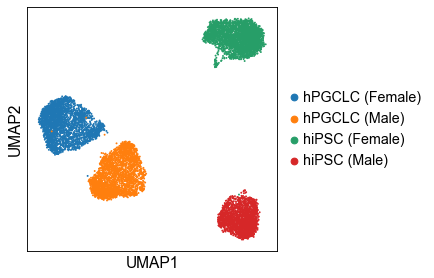

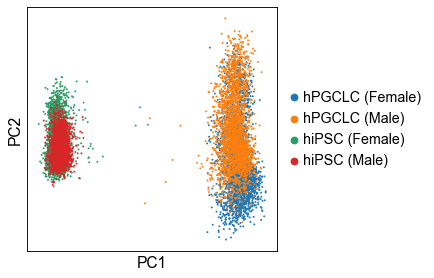

In [57]:
#sc.pl.umap(adata, color = 'sample') <- This doesn't work
sc.pl.umap(adata, color = 'sample', title = '')
sc.pl.pca(adata, color = 'sample', title ='')

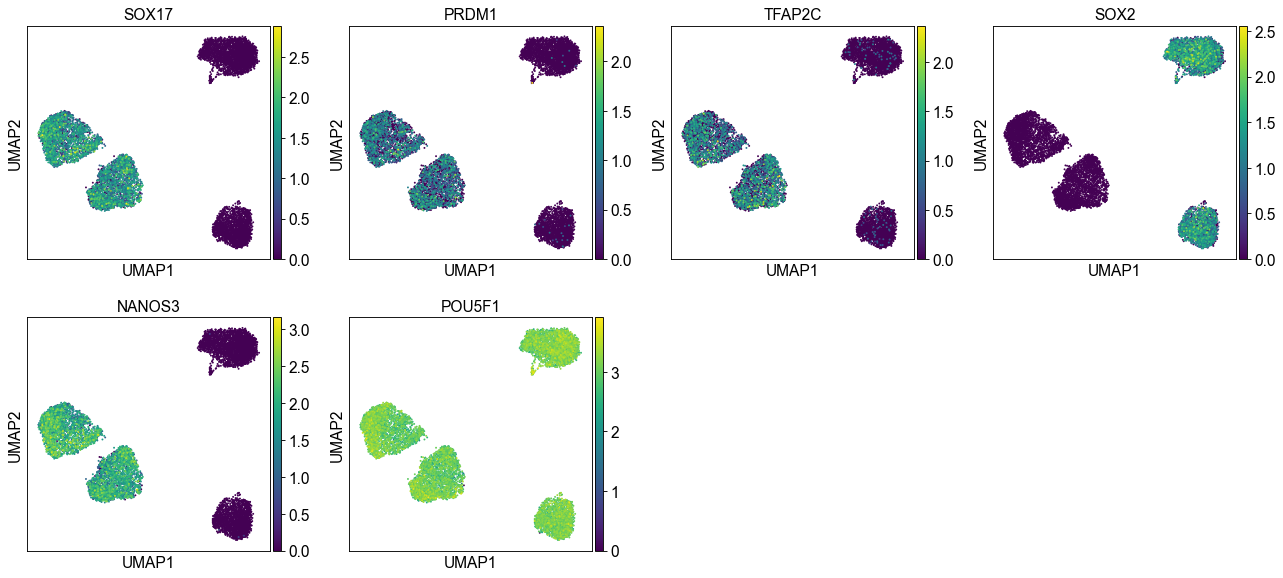

In [10]:
#UMAP Plots for Genes
sc.pl.umap(adata, color=["SOX17","PRDM1", "TFAP2C", "SOX2", "NANOS3", "POU5F1"])

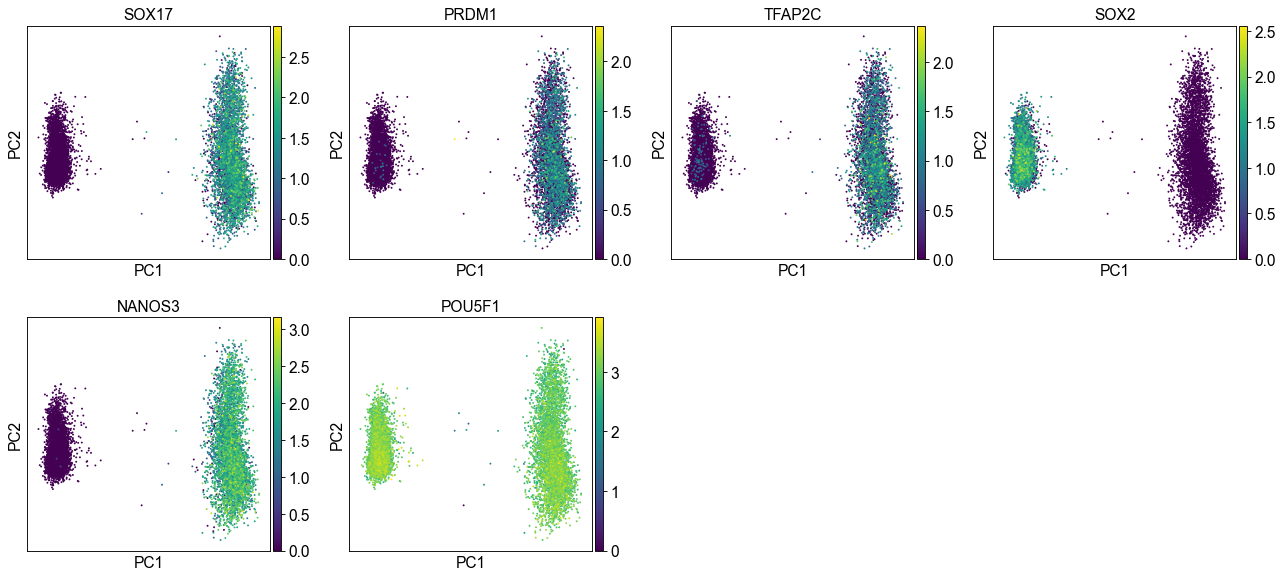

In [11]:
#PCA plots for genes
sc.pl.pca(adata, color=["SOX17","PRDM1", "TFAP2C", "SOX2", "NANOS3", "POU5F1"])